[View in Colaboratory](https://colab.research.google.com/github/rouenlee29/simple-AI-models/blob/master/TF_eager_execution_play.ipynb)

16 Oct 2018. 

# Simple linear model

In [0]:
import tensorflow as tf
tfe = tf.contrib.eager
tf.enable_eager_execution()

In [0]:
class Model(object):
  def __init__(self):
    self.W = tfe.Variable(5.0)
    self.b = tfe.Variable(0.0)
    
  def __call__(self,x):
    return self.W*x + self.b
  
model = Model()
assert model(3.0).numpy() == 15.0

In [0]:
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y-desired_y))

In [0]:
# synthesize training data with some noise 
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000


inputs = tf.random_normal(shape = [NUM_EXAMPLES])
noise = tf.random_normal(shape = [NUM_EXAMPLES])
outputs = inputs*TRUE_W + TRUE_b + noise 

In [14]:
inputs.shape

TensorShape([Dimension(1000)])

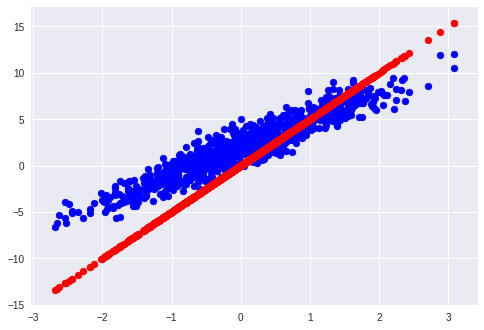

In [16]:
import matplotlib.pyplot as plt 

plt.scatter(inputs, outputs, c = 'b')
plt.scatter(inputs, model(inputs), c = 'r')
plt.show()

In [17]:
print('Current loss: ')
print(loss(model(inputs), outputs).numpy())

Current loss: 
8.736793


In [0]:
# Define a training loop 

def train(model, inputs, outputs, learning_rate):
  
  # Initialise a GradientTape to track the operations
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.73679
Epoch  1: W=4.62 b=0.39, loss=6.06366
Epoch  2: W=4.30 b=0.69, loss=4.31654
Epoch  3: W=4.05 b=0.94, loss=3.17451
Epoch  4: W=3.84 b=1.14, loss=2.42793
Epoch  5: W=3.68 b=1.30, loss=1.93981
Epoch  6: W=3.54 b=1.43, loss=1.62064
Epoch  7: W=3.43 b=1.54, loss=1.41192
Epoch  8: W=3.34 b=1.62, loss=1.27541
Epoch  9: W=3.27 b=1.69, loss=1.18612


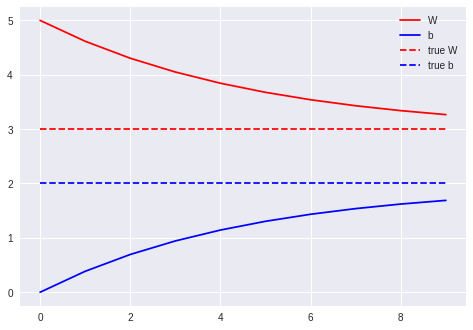

In [23]:
# See the evolution of parameters W and b

model = Model()

# Collect history of Ws and bs

Ws, bs = [], []
epochs = range(10)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)
  train(model, inputs, outputs, learning_rate = 0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %(epoch, Ws[-1], bs[-1], current_loss))
  
  
plt.plot(epochs, Ws, 'r')
plt.plot(bs, 'b')
plt.plot([TRUE_W]*len(epochs), 'r--')
plt.plot([TRUE_b]*len(epochs), 'b--')
plt.legend(['W','b','true W', 'true b'])
plt.show()

# Implementing custom layers

In [0]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    
    # line below says: instance of MyDenseLayer inherits from tf.keras.layers.Layer
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs
    
  def build(self, input_shape):
    self.kernel = self.add_variable("kernel", 
                                    shape = [input_shape[-1].value, self.num_outputs])
    
  def call(self, input):
    return tf.matmul(input, self.kernel)    

In [28]:
# initialise MyDenseLayer by creating layer object 
layer = MyDenseLayer(10) 

# print model output (input multiplied w. kernel)
print(layer(tf.ones([10,5])))

tf.Tensor(
[[ 1.0389438  -1.4177135   0.2503317  -0.7425126   1.019496    0.5978415
   0.63439167 -0.8662169   1.0713365  -0.84071314]
 [ 1.0389438  -1.4177135   0.2503317  -0.7425126   1.019496    0.5978415
   0.63439167 -0.8662169   1.0713365  -0.84071314]
 [ 1.0389438  -1.4177135   0.2503317  -0.7425126   1.019496    0.5978415
   0.63439167 -0.8662169   1.0713365  -0.84071314]
 [ 1.0389438  -1.4177135   0.2503317  -0.7425126   1.019496    0.5978415
   0.63439167 -0.8662169   1.0713365  -0.84071314]
 [ 1.0389438  -1.4177135   0.2503317  -0.7425126   1.019496    0.5978415
   0.63439167 -0.8662169   1.0713365  -0.84071314]
 [ 1.0389438  -1.4177135   0.2503317  -0.7425126   1.019496    0.5978415
   0.63439167 -0.8662169   1.0713365  -0.84071314]
 [ 1.0389438  -1.4177135   0.2503317  -0.7425126   1.019496    0.5978415
   0.63439167 -0.8662169   1.0713365  -0.84071314]
 [ 1.0389438  -1.4177135   0.2503317  -0.7425126   1.019496    0.5978415
   0.63439167 -0.8662169   1.0713365  -0.8407131

In [29]:
# print model kernel 
print(layer.variables)

[<tf.Variable 'my_dense_layer_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 3.40251803e-01, -3.46826911e-02,  3.41702104e-01,
        -2.40615904e-01, -4.02040362e-01, -2.27524400e-01,
         1.15228832e-01,  1.15520179e-01,  5.79630077e-01,
         4.64579523e-01],
       [ 5.69142282e-01, -3.05928111e-01, -1.51930183e-01,
         1.94445610e-01,  5.98992527e-01,  6.16535246e-01,
         3.92641842e-01, -1.95206970e-01, -3.60142231e-01,
        -6.26584113e-01],
       [ 3.32087040e-01, -4.66713071e-01, -3.64952087e-02,
        -7.89892077e-02,  6.20965421e-01,  3.33143771e-01,
         3.50081861e-01, -3.90362650e-01,  5.75308144e-01,
        -4.99264359e-01],
       [-2.02527314e-01, -1.66049302e-01,  5.10305583e-01,
        -1.65198714e-01,  4.39122319e-02,  1.96616232e-01,
        -5.30282438e-01, -1.23844326e-01,  3.33159268e-01,
        -1.88540429e-01],
       [-9.95397568e-06, -4.44340348e-01, -4.13250625e-01,
        -4.52154398e-01,  1.57666206e-01, -3.209293

In [0]:
# input shape is 10 x 5, kernel is 5 x 10, output is 10 x 10

# Iris dataset

Taken from [this](https://www.tensorflow.org/tutorials/eager/custom_training_walkthrough) tutorial, added my personal notes. 

In [24]:
! pip install git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-5KJQje
  Running setup.py bdist_wheel for Theano ... - \ | / - \ | / - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-zj3wrb/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.3
    Uninstalling Theano-1.0.3:
      Successfully uninstalled Theano-1.0.3


In [1]:
from __future__ import absolute_import, division, print_function
import os 
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.12.0-rc1
Eager execution: True


## Import and parse the training dataset

In [2]:
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

16384/2194 [================================================================================================================================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [3]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [0]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [5]:
# View data in pandas 
import pandas as pd

df = pd.read_csv("http://download.tensorflow.org/data/iris_training.csv")
df.head()

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [6]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size, 
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.


The make_csv_dataset function returns a tf.data.Dataset of (features, label) pairs, where features is a dictionary: {'feature_name': value}

With eager execution enabled, these Dataset objects are iterable. Let's look at a batch of features:

In [7]:
# Quick glance into each batch. dataset objects are iterable 

features, labels = next(iter(train_dataset))

features

OrderedDict([('sepal_length',
              <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
              array([7.7, 6.5, 5.8, 7. , 5.2, 4.6, 6.4, 6.3, 4.9, 6.3, 4.6, 5.7, 5. ,
                     5.1, 5.2, 4.5, 6.1, 4.9, 5.4, 6.4, 4.9, 5.1, 4.9, 6.2, 6.4, 5.1,
                     6.3, 5.3, 5.4, 6.3, 6.9, 5.4], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
              array([2.6, 3. , 2.6, 3.2, 2.7, 3.1, 2.8, 2.3, 2.4, 3.3, 3.6, 2.8, 2. ,
                     3.7, 3.4, 2.3, 2.9, 3.1, 3.7, 2.8, 3.1, 3.8, 2.5, 2.2, 3.2, 2.5,
                     3.3, 3.7, 3.4, 2.7, 3.1, 3.9], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
              array([6.9, 5.5, 4. , 4.7, 3.9, 1.5, 5.6, 4.4, 3.3, 4.7, 1. , 4.1, 3.5,
                     1.5, 1.4, 1.3, 4.7, 1.5, 1.5, 5.6, 1.5, 1.6, 4.5, 4.5, 4.5, 3. ,
                     6. , 1.5, 1.5, 4.9, 4.9, 1.3],

In [8]:
labels

<tf.Tensor: id=70, shape=(32,), dtype=int32, numpy=
array([2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 0, 2, 1, 0], dtype=int32)>

Notice that each feature is of shape (32,) as we have set the batch size to  32!

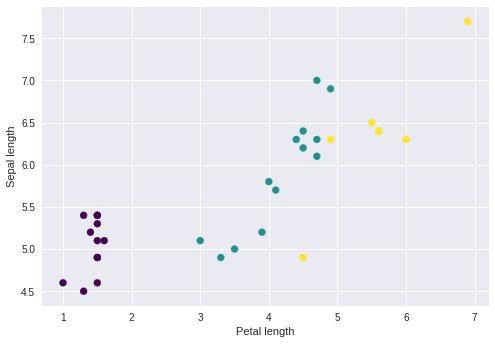

In [9]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
           cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length");

In [10]:
len(features)

4

In [11]:
features.values()
# no longer an ordered dictionary 

[<tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
 array([7.7, 6.5, 5.8, 7. , 5.2, 4.6, 6.4, 6.3, 4.9, 6.3, 4.6, 5.7, 5. ,
        5.1, 5.2, 4.5, 6.1, 4.9, 5.4, 6.4, 4.9, 5.1, 4.9, 6.2, 6.4, 5.1,
        6.3, 5.3, 5.4, 6.3, 6.9, 5.4], dtype=float32)>,
 <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
 array([2.6, 3. , 2.6, 3.2, 2.7, 3.1, 2.8, 2.3, 2.4, 3.3, 3.6, 2.8, 2. ,
        3.7, 3.4, 2.3, 2.9, 3.1, 3.7, 2.8, 3.1, 3.8, 2.5, 2.2, 3.2, 2.5,
        3.3, 3.7, 3.4, 2.7, 3.1, 3.9], dtype=float32)>,
 <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
 array([6.9, 5.5, 4. , 4.7, 3.9, 1.5, 5.6, 4.4, 3.3, 4.7, 1. , 4.1, 3.5,
        1.5, 1.4, 1.3, 4.7, 1.5, 1.5, 5.6, 1.5, 1.6, 4.5, 4.5, 4.5, 3. ,
        6. , 1.5, 1.5, 4.9, 4.9, 1.3], dtype=float32)>,
 <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
 array([2.3, 1.8, 1.2, 1.4, 1.4, 0.2, 2.2, 1.3, 1. , 1.6, 0.2, 1.3, 1. ,
        0.4, 0.2, 0.3, 1.4, 0.1, 0.2, 2.1, 0.1, 0.2, 1.7, 1.5, 1.5, 1.1,
        2.5, 0.2, 0.4, 1.8, 

In [0]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [0]:
# pack the features of each (features,label) pair into the training dataset:
train_dataset = train_dataset.map(pack_features_vector)

In [14]:
train_dataset

<MapDataset shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [15]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.1 2.8 4.  1.3]
 [5.5 2.4 3.8 1.1]
 [5.9 3.2 4.8 1.8]
 [5.  3.5 1.6 0.6]
 [4.7 3.2 1.3 0.2]], shape=(5, 4), dtype=float32)


## Select model and do quick tests

In [0]:
# select the model

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = tf.nn.relu, input_shape = (4,)),
    tf.keras.layers.Dense(10, activation = tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [0]:
# select the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = None, input_shape = (4,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation = None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(3)
])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                50        
_________________________________________________________________
batch_normalization_12 (Batc (None, 10)                40        
_________________________________________________________________
re_lu_2 (ReLU)               (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_13 (Batc (None, 10)                40        
_________________________________________________________________
re_lu_3 (ReLU)               (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 33        
Total para

guessing: for batch norm, each neuron (z) has 4 parameters: mean, std dev, gamma and beta (see evernote). Mean and std are non-trainable. We have two batch norm layers, hence 10 x 2 + 10 x 2 non-trainable params

Note that a value of None in a particular dimension of a shape means that the shape will dynamically adapt based on the shape of the inputs

In [35]:
model.trainable_variables

[<tf.Variable 'dense_21/kernel:0' shape=(4, 10) dtype=float32, numpy=
 array([[-0.05962378, -0.00963521, -0.08230478,  0.5320872 ,  0.16693878,
          0.55304396,  0.47016704,  0.50057745,  0.4833995 ,  0.03906441],
        [-0.5262396 , -0.04633689,  0.6273029 ,  0.29314995, -0.21482182,
          0.2929784 ,  0.30206627,  0.42938042, -0.31045175, -0.3789346 ],
        [-0.39012986, -0.47338003, -0.10734338,  0.40023243, -0.08827478,
          0.38527822, -0.42870215,  0.4744283 ,  0.5185362 ,  0.19272393],
        [ 0.54958713, -0.5641157 , -0.06421524, -0.12563556, -0.21099049,
         -0.14294064, -0.1845757 ,  0.09060633, -0.35030594, -0.05781901]],
       dtype=float32)>,
 <tf.Variable 'dense_21/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'batch_normalization_14/gamma:0' shape=(10,) dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>,
 <tf.Variable 'batch_normalization

In [177]:
# use the model 
predictions = model(features)

# returns logits (unnormalised log probabilities)
predictions[:5]

<tf.Tensor: id=125633, shape=(5, 3), dtype=float32, numpy=
array([[ 3.4371305 , -2.9100568 ,  1.5849237 ],
       [ 2.123835  , -1.2165444 ,  0.48441592],
       [ 1.8271852 , -1.1067927 ,  0.36426684],
       [ 2.7593498 , -2.2991717 ,  1.2041936 ],
       [ 3.9740465 , -3.4195976 ,  1.8489878 ]], dtype=float32)>

In [178]:
# use softmax to convert logists to probability 
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=125639, shape=(5, 3), dtype=float32, numpy=
array([[8.63079131e-01, 1.51182769e-03, 1.35408983e-01],
       [8.13327968e-01, 2.88109351e-02, 1.57861054e-01],
       [7.78364837e-01, 4.13973741e-02, 1.80237800e-01],
       [8.21347594e-01, 5.21962298e-03, 1.73432797e-01],
       [8.92824352e-01, 5.49220946e-04, 1.06626414e-01]], dtype=float32)>

In [179]:
# taking tf.argmax gives us the argumest of the largest value 
print('Predictions: {}'.format(tf.argmax(predictions, axis = 1)))
print('Labels: {}'.format(labels))

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Labels: [1 0 0 1 2 2 0 0 2 1 2 1 2 1 1 0 2 0 0 1 1 2 0 0 0 2 0 1 0 1 2 0]


## Train the model

In [36]:
# loss function
def loss(model,x,y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


l = loss(model, features, labels)
print("Loss test:{}".format(l))

Loss test:6.12003135681


In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model,inputs, targets)
  return loss_value, tape.gradient(loss_value,model.trainable_variables)

# trainable_variables is a field of tf.keras.Sequential

## Optimisation

In [0]:
# An optimizer applies the computed gradients to the model's variables to minimize the loss function

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
global_step = tf.train.get_or_create_global_step()

In [39]:
loss_value, grads = grad(model, features, labels)

print("Step:{}, Initial loss: {}".format(global_step.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads,model.variables),global_step)

print("Step:{}, Loss:{}".format(global_step.numpy(), loss(model, features, labels)))

Step:0, Initial loss: 6.12003135681
Step:1, Loss:4.08195066452


In [40]:
# example use of tfe metrics
m = tfe.metrics.Mean()
for input in [1,2,3]:
  m(input)
print(m.result())


a = tfe.metrics.Accuracy()
a([1,2,3,4], [1,2,5,5]) # accuracy of 50%
a([1,2],[1,2]) # accuracy of 100%
print(a.result()) # 4/6 correct comparisons 

tf.Tensor(2.0, shape=(), dtype=float64)
tf.Tensor(0.6666666666666666, shape=(), dtype=float64)


In [41]:
total_epochs = 210

train_loss_epoch = []
train_accuracy_epoch = []


for epoch in range(0,total_epochs):
  
  # for each new epoch, restart the tracking of loss and accuracy
  batch_mean = tfe.metrics.Mean()
  batch_accuracy = tfe.metrics.Accuracy()
  
  for x,y in train_dataset:
    # forward & backward pass 
    loss_value, grads = grad(model, x,y)
    
    # perform update
    optimizer.apply_gradients(zip(grads,model.variables), global_step)
    
    # add current batch loss 
    batch_mean(loss_value)
    
    # add current batch accuracy
    batch_accuracy(tf.argmax(model(x), axis = 1, output_type = tf.int32),y)
    
  # end of epoch (cycled through entire dataset): take the...
  # aggegrated statistics over all batches
  train_loss_epoch.append(batch_mean.result())
  train_accuracy_epoch.append(batch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss {:.3f}, Accuracy {:.3%}".format(epoch,batch_mean.result(),batch_accuracy.result()))
    

Epoch 000: Loss 2.200, Accuracy 35.000%
Epoch 050: Loss 0.364, Accuracy 92.500%
Epoch 100: Loss 0.211, Accuracy 95.833%
Epoch 150: Loss 0.239, Accuracy 94.167%
Epoch 200: Loss 0.110, Accuracy 96.667%


Text(0.5,1,u'Accuracy vs epochs')

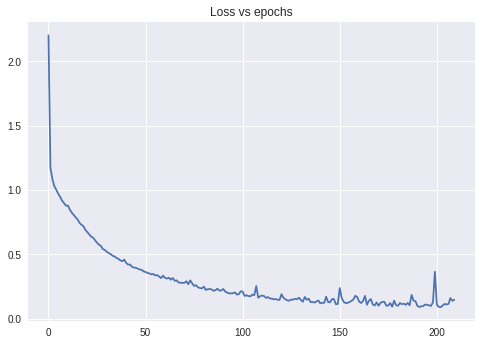

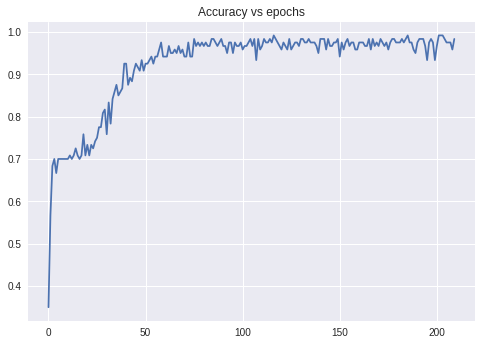

In [42]:
# Plot the loss for all epochs using Matplotlib
plt.figure()
plt.plot(range(total_epochs), train_loss_epoch)
plt.title('Loss vs epochs')

# Plot the accuracy for all epochs using Matplotlib
plt.figure()
plt.plot(range(total_epochs), train_accuracy_epoch)
plt.title('Accuracy vs epochs')

## Test the model

In [43]:
test_dataset_url = "http://download.tensorflow.org/data/iris_test.csv"
test_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(test_dataset_url),
                                           origin=test_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

16384/573 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [44]:
!head -n5 {test_dataset_fp}

30,4,setosa,versicolor,virginica
5.9,3.0,4.2,1.5,1
6.9,3.1,5.4,2.1,2
5.1,3.3,1.7,0.5,0
6.0,3.4,4.5,1.6,1


In [0]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_dataset_fp,
    batch_size, 
    column_names=column_names,
    label_name=label_name,
    num_epochs=1,
    shuffle = False)

In [0]:
test_dataset = test_dataset.map(pack_features_vector)

In [47]:
batch_loss = tfe.metrics.Mean()
batch_accuracy = tfe.metrics.Accuracy()

for x,y in test_dataset:
    # forward pass 
    loss_value = loss(model, x, y)
    prediction = tf.argmax(model(x), axis = 1, output_type = tf.int32)
    
    # add current batch loss 
    batch_loss(loss_value)
    
    # add current batch accuracy
    batch_accuracy(prediction,y)
    
print("Test set loss is {:.3f}".format(batch_loss.result()))
print("Test set accuracy is {:.3%}".format(batch_accuracy.result()))

Test set loss is 0.085
Test set accuracy is 96.667%


No batch norm model result: 
- Test set loss is 0.160
- Test set accuracy is 93.333%

Batch Norm model result:
- Test set loss is 0.085
- Test set accuracy is 96.667%

## Making individual predictions 

In [202]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)
# tf.argmax(model(predict_dataset), axis = 1, output_type = tf.int32)

for i,j in enumerate(predictions):
  logits = tf.nn.softmax(j)
  index = tf.argmax(logits)
  p = tf.reduce_max(logits)
 
  print("Example {}, prediction {}, probability {:4.1%}".format(i,class_names[index], p))

Example 0, prediction Iris setosa, probability 97.0%
Example 1, prediction Iris versicolor, probability 88.2%
Example 2, prediction Iris virginica, probability 92.6%


In [205]:
# a note on enumerate on matrices:

predictions = model(predict_dataset)
print(predictions)
print("-"*70)
for i,j in enumerate(predictions):
  print(i)
  print(j)
 # iterates row by row

tf.Tensor(
[[ 6.0438356  2.5577846 -7.786861 ]
 [-1.7646556  2.8320196  0.7376523]
 [-3.9721222  2.118225   4.6527386]], shape=(3, 3), dtype=float32)
----------------------------------------------------------------------
0
tf.Tensor([ 6.0438356  2.5577846 -7.786861 ], shape=(3,), dtype=float32)
1
tf.Tensor([-1.7646556  2.8320196  0.7376523], shape=(3,), dtype=float32)
2
tf.Tensor([-3.9721222  2.118225   4.6527386], shape=(3,), dtype=float32)
